# How to choose splits when doing cross validation?

**Presented by:** 

_Aduragbemi Samuel Adetunji, Aleksei Berdiuzhenko, Harold Horsley, Bjørnar Ørjansen Kaarevik_ and _Amanda Ledell_ 

**Date:** 

_September 18th 2024_

# Introduction

<table>
<tr>
<td>
<ul>
  <li>Important problems</li>
  <ul>
    <li>Ensure good covering of the data</li>
    <li>Ensure each split represents the data</li>
  </ul>
  <li>First idea: Random Sampling</li>
  <ul>
    <li>No special statistical properties</li>
    <li>No guarantees for performance</li>
  </ul>
  <li>Better ideas?</li>
  <ul>
    <li>Kennard-Stone algorithm</li>
    <li>k-fold cross validation</li>
    <li>Special treatment of categories</li>
    <li>Special treatment of time series</li>
    <li>... and so much more</li>
  </ul>
</ul>

</td>
<td>
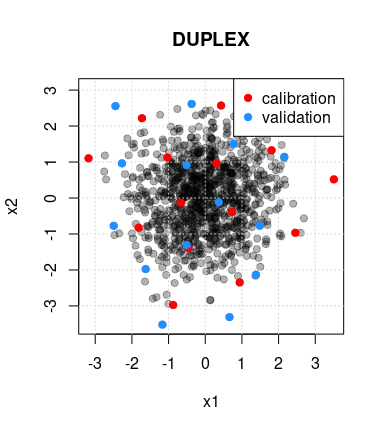

</td>

# K-fold cross validation

  - **Why would we do it?**
      - Reduce variance in the model by utilizing more data.
  - **When is it useful?**
      - General purpose, balanced datasets
  - **How many folds?**
      - Few folds: less computation, more variance
      - Many folds: more computation, less variance

### K-fold cross validation
<img src="KFold.png" alt="Drawing" style="width: 1100px;"/>


### Python Code Example

In [ ]:
#from sklearn.model_selection import KFold

kf = KFold(
    n_splits = 5,       # Number of fold. Must be at least 2, default is 5
    shuffle = True,     # Should data be shuffled before splitting? Default is False
    random_state = 42   # Set for reproducability. Only used when shuffle=True
)

# Loop through the splits to train and evaluate the model.
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

### Pros and cons

- Pros
  - Simple to implement
  - Reduces variance
- Cons
  - Computationally expensive for large `k`
  - Computationally expensive for large datasets
  - Not suited for imbalanced datasets!

# Stratified K-Fold Cross-Validation

**When to use it?** For unblanaced (class) datasets

**How?** Perserves the percentage of samples for each fold



<img src="ClassOnly.png" alt="Drawing" style="width: 1100px;"/>


### Python Code Example

In [ ]:
#from sklearn.model_selection import StratifiedKFold

# Create StratifiedKFold object
skf = StratifiedKFold(
    n_splits=4,        # Number of folds. Must be at least 2, default is 5
    shuffle=True,      # Should data be shuffled before spliting? Default is False
    random_state=42    # Set for reproducibility. Only used when shuffle=True.
)

# You need to loop through the splits, train and evaluate the model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

### Pros and Cons

- **Pros**:
  - Perserves class distributions among all folds and training/validation sets
  - Provides more accurate estimates for imbalanced datasets.
  
- **Cons**:
  - Not guranteed to improve the accuracy of the model
  - May be unnecessary for some datasets.
  - Can cause data-leakage if groups are present

# Group K-Fold Cross-Validation

**When to use it?** When you have multiple measurements from the same subject

**How Does it Work?** Ensures that you validate the model on a different group than you trained on



<img src="GroupOnly.png" alt="Drawing" style="width: 1100px;"/>


### Python Code Example

In [ ]:
from sklearn.model_selection import GroupKFold

# Create StratifiedKFold object
skf = GroupKFold(
    n_splits=4,        # Number of folds. Must be at least 2, default is 5
)

groups = np.array(['Patient_A', 'Patient_B', 'Patient_C'])

# You need to loop through the splits, train and evaluate the model
for train_index, test_index in skf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

### Pros and Cons

- **Pros**:
  - Prevents data leakage between training and validation sets.
  - Maintains class distributions
  
- **Cons**:
  - Requires group labels.
  - Complexity increases with overlapping groups.

# Have an imbalanced dataset and groups?


# Stratified Group K-Fold Validation

<img src="Both.png" alt="Drawing" style="width: 1100px;"/>


#### _It is slighlty more computationally intensive and complex **BUT** you get the best of both worlds_

### Python Code Example

In [ ]:
from sklearn.model_selection import StratifiedGroupKFold

# Create StratifiedKFold object
skf = StratifiedGroupKFold(
    n_splits=5,        # Number of folds. Must be at least 2, default is 5
    shuffle=True,      # Should data be shuffled before spliting? Default is False
    random_state=42    # Set for reproducibility. Only used when shuffle=True.
)
groups = np.array(['Patient_A', 'Patient_B', 'Patient_C'])

# You need to loop through the splits, train and evaluate the model
for train_index, test_index in skf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# Leave-One-Out Cross-Validation (LOOCV) 

### Overview
Uses a single data point as the validation set and the rest as the training set. This process repeats for each data point.


### When to Use

- **Small Datasets**: When the dataset is very small, and you want to maximize the training data.







# Method
- The dataset is divided into n subsets, where n is the number of data points (samples).
- For each iteration, the model is trained on n-1 samples, leaving just one sample for testing.
- This process is repeated n times, each time using a different sample as the test set.
- The performance metric (e.g., accuracy, mean squared error, etc.) is calculated for each iteration.
- The overall performance is the average of the performance metrics across all iterations.



### Python Example

In [ ]:
from sklearn.model_selection import LeaveOneOut

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set (one sample)
    y_pred = model.predict(X_test)

    # Calculate accuracy for this test sample
    accuracies.append(accuracy_score(y_test, y_pred))

# Calculate and print the average accuracy across all iterations
average_accuracy = np.mean(accuracies)


### Pros and Cons
- **Pros**:
  - Uses as much data as possible for training.
  - Low bias since almost all data is used for training.
  - No random splitting, hence same results on the same data.
  
- **Cons**:
  - Extremely computationally intensive for large datasets.
  - High variance since validation is performed on a single sample.

# Time Series Cross-Validation

### Overview

Data split that takes into account the **temporal order** of the data. We do this
- To avoid **data leakage**. I.e. using future events to predict the past (obviously impossible in reality).
- To take into account temporal dependence in the training process

## Characteristics

1. **Sequential Validation** - Training and test sets are *consecutive in time*

2. **Forward-chaining** - Training set grows with each iteration, meaning the model is evaluated on unseen data


## Expanding Window

Take an example of 100 data points.

- Divide time series into windows e.g. 5 windows of 20 data points
- Train on the first window [0 - 19] and test on the second [20 - 39]
- Shift windows forward and repeat e.g. train on [0 - 39] and test on [40 - 59]

<img src="Expanding.png" alt="Drawing" style="width: 600px; height: 400px"/>

In [ ]:
tscv = TimeSeriesSplit(n_splits=4)

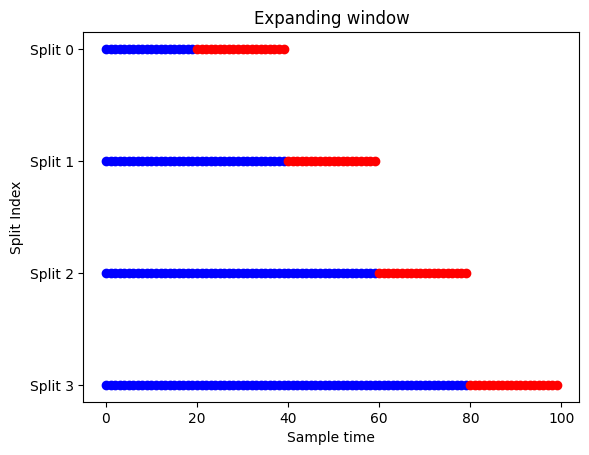

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

## Expanding window time series split

# Generate synthetic time samples
X = np.linspace(0, 99, 100)

# Split into train and test sets with 4 splits
tscv = TimeSeriesSplit(n_splits=4)
splits_dict = {}
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    splits_dict[i] = {'X_train': X_train, 'X_test': X_test}

# Plotting
fig, ax = plt.subplots()
ax.set_title('Expanding window')
ax.set_xlabel('Sample time')
ax.set_ylabel('Split Index')

for i, split in splits_dict.items():
    X_train = split['X_train']
    X_test = split['X_test']
    ax.plot(X_train, [i] * len(X_train), 'bo', label=f'Train Split {i}')
    ax.plot(X_test, [i] * len(X_test), 'ro', label=f'Test Split {i}')

ax.set_yticks(list(splits_dict.keys()))
ax.set_yticklabels([f'Split {i}' for i in splits_dict.keys()])
ax.invert_yaxis()
plt.show()


## Rolling window validation 
- Same as expanding window, except the training set does **NOT** grow

Test sets can also be pushed forward in time e.g. train: 0 - 10, test: 40 - 50

*The important thing to consider is how you will use the model in practice and to replicate that in the training process*.

<img src="Rolling.png" alt="Drawing" style="width: 600px; height: 400px"/>

In [ ]:
tscv = TimeSeriesSplit(n_splits=4, max_train_size=20)

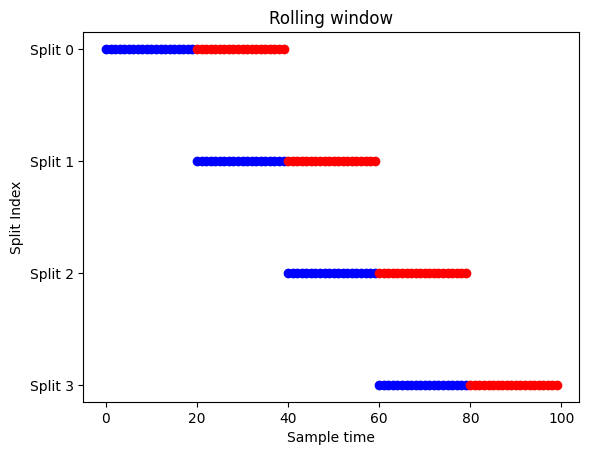

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(0, 99, 100)

# Rolling window split i.e. set max_train_size to the rolling window size
tscv = TimeSeriesSplit(n_splits=4, max_train_size=20)
splits_dict = {}
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    splits_dict[i] = {'X_train': X_train, 'X_test': X_test}

# Plotting
fig, ax = plt.subplots()
ax.set_title('Rolling window')
ax.set_xlabel('Sample time')
ax.set_ylabel('Split Index')

for i, split in splits_dict.items():
    X_train = split['X_train']
    X_test = split['X_test']
    ax.plot(X_train, [i] * len(X_train), 'bo', label=f'Train Split {i}')
    ax.plot(X_test, [i] * len(X_test), 'ro', label=f'Test Split {i}')

ax.set_yticks(list(splits_dict.keys()))
ax.set_yticklabels([f'Split {i}' for i in splits_dict.keys()])
ax.invert_yaxis()
plt.show()


### Pros and Cons

- **Pros**:
  - Respects temporal dependencies
  - Prevents data leakage from future data

- **Cons**:
  - Clearly restrictive in terms of the way one can split data therefore only applicable to time series data

# How many samples in each test/validation/train chunk?

### Lets take some data example and try to observe the effect of splitting of dataset in terms of splitting on (Test - Validation - Train) parts, and in terms of using KFold validation both on an example of ANN.

In [ ]:
import pandas as pd
# https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data
dataset_path = "/content/insurance.csv"
data = pd.read_csv(dataset_path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Define the MLP model with Dropout
class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_prob=0):
        super(MLP, self).__init__()
        layers = []
        in_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(in_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))  # Add dropout layer
            in_size = hidden_size
        layers.append(nn.Linear(in_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [ ]:
# Split the dataset into training, validation, and test sets
train_size = int(TRAIN_SPLIT_PERC * len(dataset))
val_size = int(VAL_SPLIT_PERC * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Experiment with different numbers of folds
for k_folds in [3, 5, 10, 25, 50]:
    print(f'Using {k_folds} folds for cross-validation')
    kfold = KFold(n_splits=k_folds, shuffle=True)

    # Training settings
    num_epochs = 20
    input_size = 7
    hidden_sizes = [16, 8, 4]
    output_size = 1  # For regression, output size is typically 1
    learning_rate = 0.02  # Lower learning rate


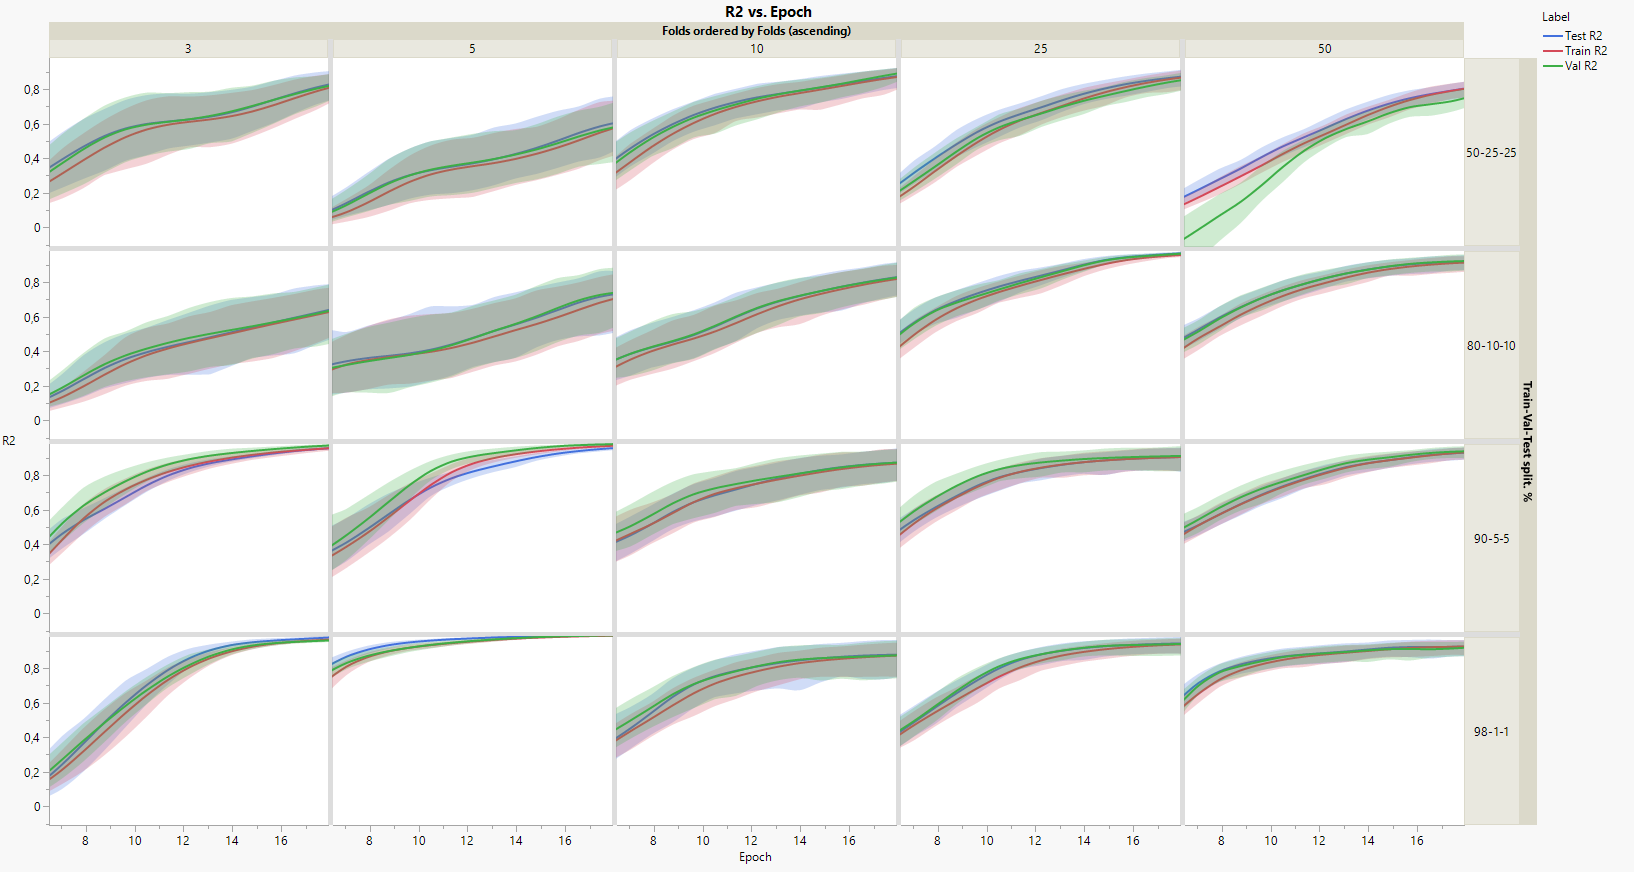

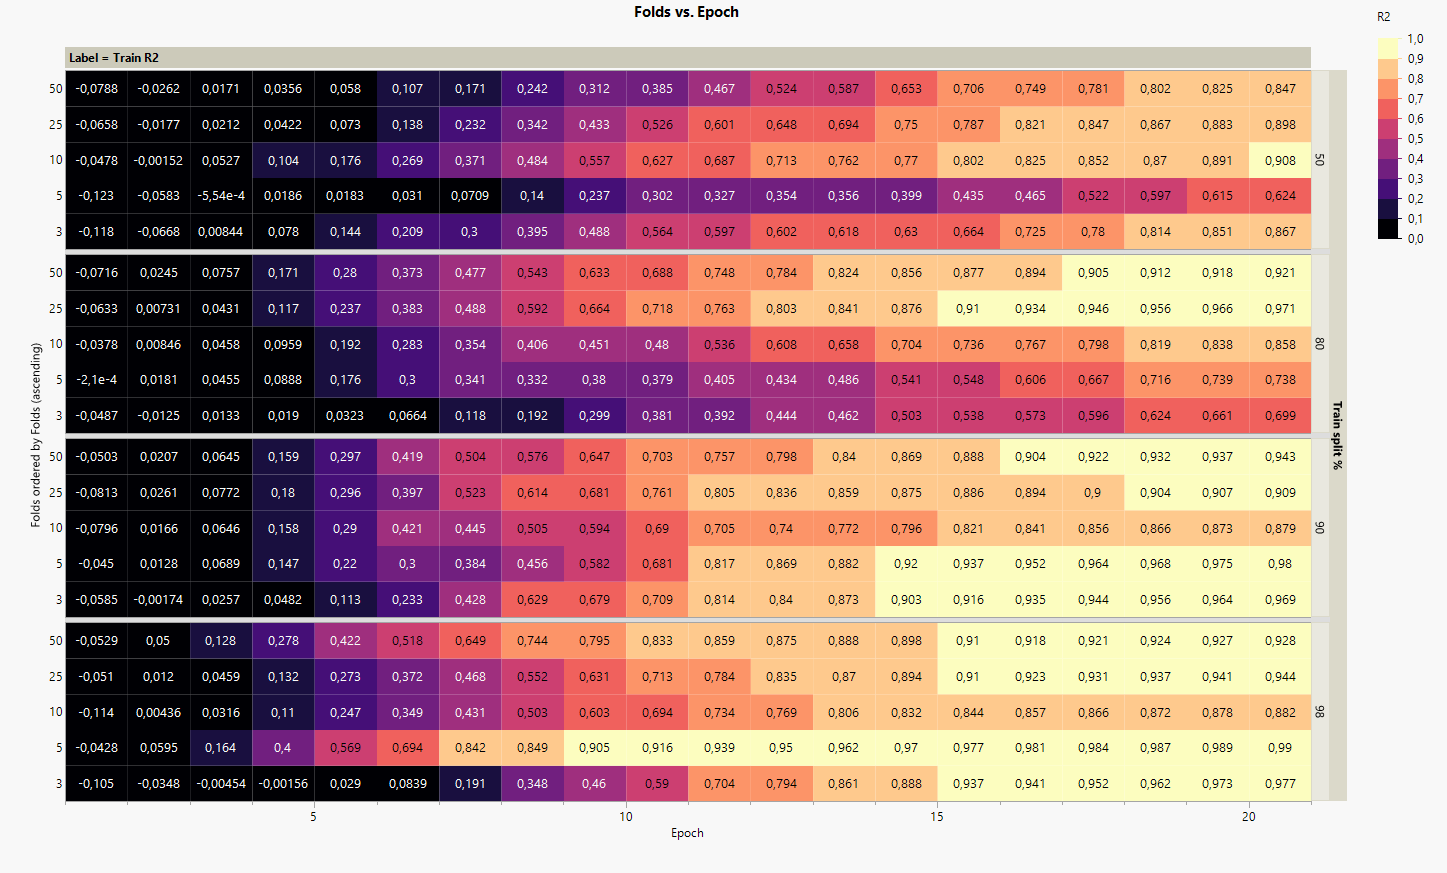

# Conclusion


### Cross-Validation Methods: When to Use

1. **K-Fold Cross-Validation**
   - **Best For**: General model evaluation when you have a balanced dataset.
   - **Bad For**: Imbalanced datasets without stratification.

2. **Stratified K-Fold Cross-Validation**
   - **Best For**: Classification problems with imbalanced classes to maintain class distribution.
   - **Bad For**: Regression problems where class distribution is not a concern.

3. **Leave-One-Out Cross-Validation (LOOCV)**
   - **Best For**: Small datasets where you want to maximize training data usage.
   - **Bad For**: Large datasets due to high computational cost.

4. **Time Series Cross-Validation (TimeSeriesSplit)**
   - **Best For**: Time series forecasting to respect temporal order.
   - **Bad For**: Non-time series data where temporal order is irrelevant.

5. **Group K-Fold Cross-Validation**
   - **Best For**: Datasets with grouped observations to prevent data leakage from groups.
   - **Bad For**: Datasets without natural groupings or when groups are not predefined.

# Conclusion
| **Cross-Validation Method**             | **Best For**                                                    | **Bad For**                                                 |
|-----------------------------------------|-----------------------------------------------------------------|-------------------------------------------------------------|
| **K-Fold Cross-Validation**             | General model evaluation with balanced datasets                 | Imbalanced datasets without stratification                   |
| **Stratified K-Fold Cross-Validation**  | Classification problems with imbalanced classes to maintain distribution | Regression problems where class distribution is irrelevant |
| **Leave-One-Out Cross-Validation (LOOCV)** | Small datasets where maximizing training data usage is crucial  | Large datasets due to high computational cost                |
| **Time Series Cross-Validation (TimeSeriesSplit)** | Time series forecasting to respect temporal order              | Non-time series data where temporal order doesn't matter     |
| **Group K-Fold Cross-Validation**       | Datasets with grouped observations to prevent data leakage from groups | Datasets without natural groupings or undefined groups       |


# Sources
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py (StratifiedKFold and group fold validation images)
https://medium.com/@soumyachess1496/cross-validation-in-time-series-566ae4981ce4 (Time series cross-validation: image) \
https://www.kaggle.com/datasets/prasad22/healthcare-dataset/data (dataset for demonstrating train/val/test splitting effects)

https://cran.r-project.org/web/packages/prospectr/vignettes/prospectr.html (examples of algorithms for sampling)
https://physics.mff.cuni.cz/wds/proc/pdf10/WDS10_105_i1_Reitermanova.pdf (discussions from 2010 regarding data splitting)